In [1]:
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.linear_model import LinearRegression  
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from joblib import load
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df01 = pd.read_csv('V2_Cleaned_Volkswagen_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df02 = pd.read_csv('V2_Cleaned_Toyota_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df03 = pd.read_csv('V2_Cleaned_Skoda_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df04 = pd.read_csv('V2_Cleaned_Renault_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df05 = pd.read_csv('V2_Cleaned_Opel_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df06 = pd.read_csv('V2_Cleaned_Ford_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file
df07 = pd.read_csv('V2_Cleaned_Fiat_DataFrame.csv', delimiter=';') # Specify the delimiter used in the CSV file


In [3]:
sum_df = pd.concat([df01, df02, df03, df04, df05, df06, df07], ignore_index=True) #birleştirme

In [4]:
df0=sum_df.drop(columns=['Unnamed: 0','Ürün Kodu',]) 
#gereksiz sütunları çıkarma


In [5]:
df0["Yaş"]=2023-df0["Araç Yılı"] #yaş ekler

#Aşağıdaki kodlar veri türlerini sayısal tiplere çevirir
df0['Kilometre'] = df0['Kilometre'].astype(str).str.replace(' km', '').str.replace('.', '').astype(float)
df0['Motor Hacmi'] = df0['Motor Hacmi'].astype(str).str.replace(' cc', '').astype(int)
df0['Motor Gücü'] = df0['Motor Gücü'].astype(str).str.replace(' hp', '').astype(int)
df0['Ortalama Yakıt Tüketimi'] = df0['Ortalama Yakıt Tüketimi'].astype(str).str.replace(' lt', '').str.replace(',', '.').astype(float)
df0['Fiyat'] = df0['Fiyat'].astype(str).str.replace(' TL', '').str.replace('.', '').astype(int)
df0['Depo Hacmi'] = df0['Depo Hacmi'].astype(str).str.replace(' lt', '').str.replace(',', '.').astype(float)


In [6]:
df0

,Marka,Seri,Model,Araç Yılı,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş Tipi,Ortalama Yakıt Tüketimi,Depo Hacmi,Boya/Değişen Bilgisi,Fiyat,Yaş
0,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2018,161000.0,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,115,Önden Çekiş,4.2,50.0,1 boyalı,970000,5
1,Volkswagen,Polo,1.0 TSi Highline,2018,82000.0,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,95,Önden Çekiş,4.6,40.0,4 boyalı,860000,5
2,Volkswagen,Passat,1.6 TDi Business,2020,76000.0,Yarı Otomatik,Dizel,Sedan,Beyaz,1598,120,Önden Çekiş,4.0,59.0,Tamamı orjinal,1530000,3
3,Volkswagen,VW CC,1.4 TSi,2013,130000.0,Yarı Otomatik,Benzin,Coupe,Beyaz,1390,160,Önden Çekiş,6.1,70.0,Tamamı orjinal,915000,10
4,Volkswagen,Polo,1.4 TDi Comfortline,2016,73000.0,Düz,Dizel,Hatchback/5,Beyaz,1422,90,Önden Çekiş,3.4,45.0,Tamamı orjinal,770000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,Fiat,Palio,1.3 Multijet Active Sole,2010,159000.0,Düz,Dizel,Hatchback/5,Beyaz,1248,70,Önden Çekiş,4.6,51.0,Belirtilmemiş,403000,13
14599,Fiat,Egea,1.4 Fire Easy,2019,68000.0,Düz,Benzin,Sedan,Beyaz,1368,95,Önden Çekiş,5.7,45.0,Tamamı orjinal,600000,4
14600,Fiat,Linea,1.3 Multijet Pop,2016,161000.0,Düz,Dizel,Sedan,Beyaz,1248,95,Önden Çekiş,4.9,45.0,Belirtilmemiş,515000,7
14601,Fiat,Punto,1.4 Easy S&S,2013,194800.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1368,77,Önden Çekiş,5.7,45.0,"3 değişen, 2 boyalı",510000,10


In [7]:
#Sayısal tipteki veriler için kolon seçer
smaller_df1 = df0.loc[:,['Yaş','Kilometre','Motor Hacmi','Motor Gücü','Ortalama Yakıt Tüketimi','Depo Hacmi','Fiyat']]
smaller_df1  #veri seti aykırı değerlidir

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat
0,5,161000.0,1598,115,4.2,50.0,970000
1,5,82000.0,999,95,4.6,40.0,860000
2,3,76000.0,1598,120,4.0,59.0,1530000
3,10,130000.0,1390,160,6.1,70.0,915000
4,7,73000.0,1422,90,3.4,45.0,770000
...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000
14599,4,68000.0,1368,95,5.7,45.0,600000
14600,7,161000.0,1248,95,4.9,45.0,515000
14601,10,194800.0,1368,77,5.7,45.0,510000


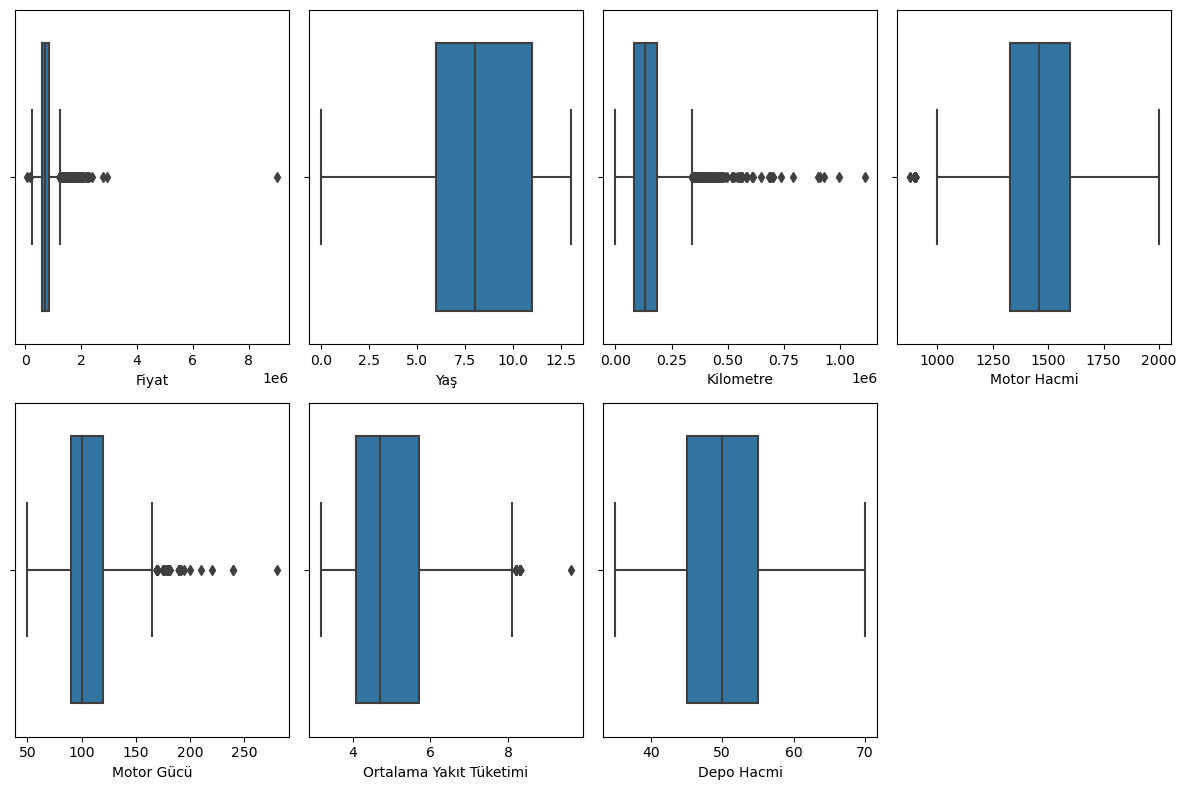

In [8]:
#aykırı değerlerin boxplot ile gösterimi

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
sns.boxplot(x=smaller_df1['Fiyat'])
plt.subplot(2, 4, 2)
sns.boxplot(x=smaller_df1['Yaş'])
plt.subplot(2, 4, 3)
sns.boxplot(x=smaller_df1['Kilometre'])
plt.subplot(2, 4, 4)
sns.boxplot(x=smaller_df1['Motor Hacmi'])
plt.subplot(2, 4, 5)
sns.boxplot(x=smaller_df1['Motor Gücü'])
plt.subplot(2, 4, 6)
sns.boxplot(x=smaller_df1['Ortalama Yakıt Tüketimi'])
plt.subplot(2, 4, 7)
sns.boxplot(x=smaller_df1['Depo Hacmi'])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Yaş'}>,
        <Axes: title={'center': 'Kilometre'}>,
        <Axes: title={'center': 'Motor Hacmi'}>],
       [<Axes: title={'center': 'Motor Gücü'}>,
        <Axes: title={'center': 'Ortalama Yakıt Tüketimi'}>,
        <Axes: title={'center': 'Depo Hacmi'}>],
       [<Axes: title={'center': 'Fiyat'}>, <Axes: >, <Axes: >]],
      dtype=object)

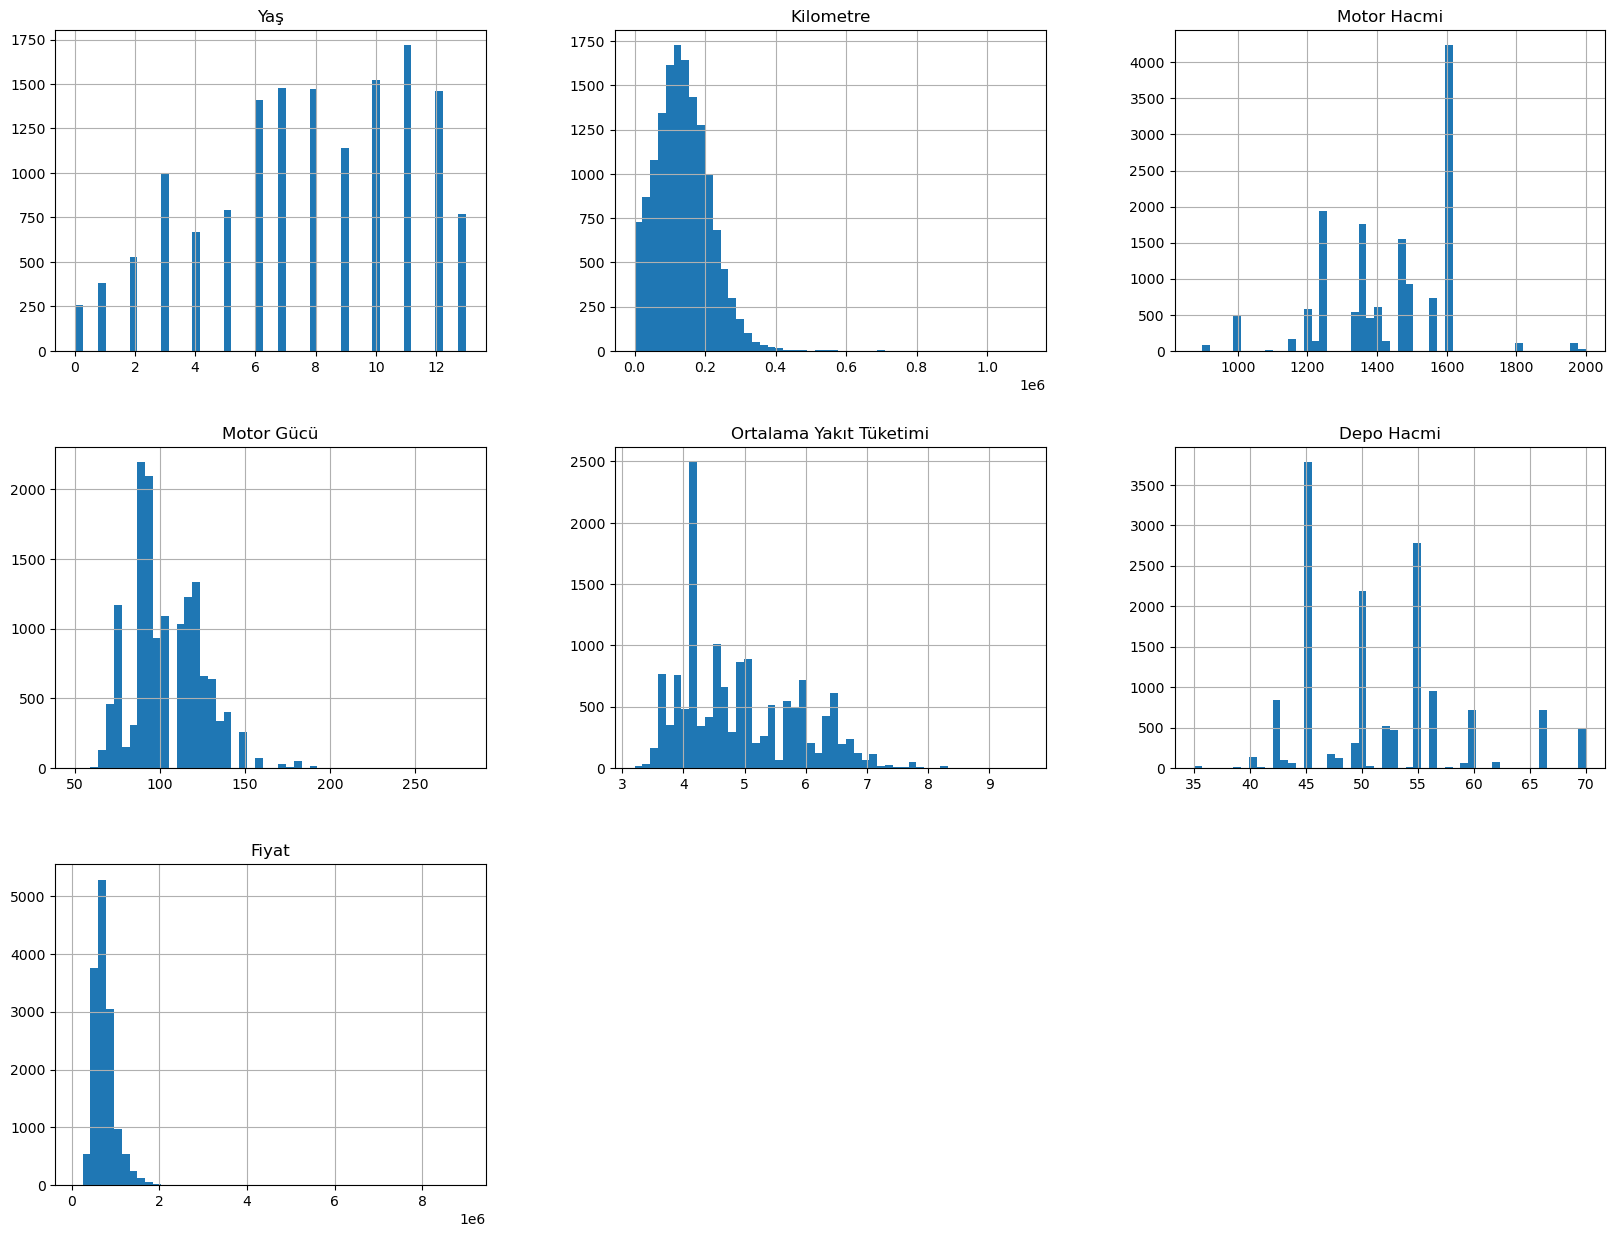

In [9]:
smaller_df1.hist(bins=50, figsize=(20,15))   #histogram çizdirir ön veri incelenmesi için kullanılır

In [10]:
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25) #1. çeyrek
    Q3 = data.quantile(0.75) #3. çeyrek
    IQR = Q3 - Q1 #çeyrekler arası aralık
    upper_bound = (Q3 + 1.5 * IQR)
    lower_bound = (Q1 - 1.5 * IQR)
    outliers = data[(data < lower_bound) | (data > upper_bound)] #outlierları bulur
    return lower_bound, upper_bound, outliers #outlierları döndürür


LB, UB, outliers = find_outliers_IQR(smaller_df1)

print("upper bound of Fiyat:","\n", UB)    #üst sınır
print("lower bound of Fiyat:","\n", LB)    #alt sınır

#çıkan değerler ile aykırı değerlerden kurtulmak için filtreleme yapılır


upper bound of Fiyat: 
 Yaş                             18.5
Kilometre                   340909.5
Motor Hacmi                   2001.5
Motor Gücü                     165.0
Ortalama Yakıt Tüketimi          8.1
Depo Hacmi                      70.0
Fiyat                      1239750.0
dtype: float64
lower bound of Fiyat: 
 Yaş                            -1.5
Kilometre                  -72182.5
Motor Hacmi                   925.5
Motor Gücü                     45.0
Ortalama Yakıt Tüketimi         1.7
Depo Hacmi                     30.0
Fiyat                      200150.0
dtype: float64


In [11]:
#aykırı değer ayıklaması

df = df0[(200000 < df0['Fiyat']) & (df0['Fiyat'] < 1500000) & (df0['Kilometre'] < 350000) & (900 < df0['Motor Hacmi']) & (df0['Motor Hacmi'] < 1700) & (df0['Motor Gücü'] < 170) & (df0['Ortalama Yakıt Tüketimi'] < 8.1) & (df0['Depo Hacmi'] < 70)]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13527 entries, 0 to 14602
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Marka                    13527 non-null  object 
 1   Seri                     13527 non-null  object 
 2   Model                    13527 non-null  object 
 3   Araç Yılı                13527 non-null  int64  
 4   Kilometre                13527 non-null  float64
 5   Vites Tipi               13527 non-null  object 
 6   Yakıt Tipi               13527 non-null  object 
 7   Kasa Tipi                13527 non-null  object 
 8   Renk                     13527 non-null  object 
 9   Motor Hacmi              13527 non-null  int64  
 10  Motor Gücü               13527 non-null  int64  
 11  Çekiş Tipi               13527 non-null  object 
 12  Ortalama Yakıt Tüketimi  13527 non-null  float64
 13  Depo Hacmi               13527 non-null  float64
 14  Boya/Değişen Bilgisi     13

In [13]:
smaller_df2 = df.loc[:,['Yaş','Kilometre','Motor Hacmi','Motor Gücü','Ortalama Yakıt Tüketimi','Depo Hacmi','Fiyat']] 
smaller_df2 #veri setindeki aykırı değerler azaltıldı

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat
0,5,161000.0,1598,115,4.2,50.0,970000
1,5,82000.0,999,95,4.6,40.0,860000
4,7,73000.0,1422,90,3.4,45.0,770000
6,9,115000.0,1390,122,6.2,55.0,980000
7,9,93500.0,1390,85,5.9,45.0,665000
...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000
14599,4,68000.0,1368,95,5.7,45.0,600000
14600,7,161000.0,1248,95,4.9,45.0,515000
14601,10,194800.0,1368,77,5.7,45.0,510000


array([[<Axes: title={'center': 'Yaş'}>,
        <Axes: title={'center': 'Kilometre'}>,
        <Axes: title={'center': 'Motor Hacmi'}>],
       [<Axes: title={'center': 'Motor Gücü'}>,
        <Axes: title={'center': 'Ortalama Yakıt Tüketimi'}>,
        <Axes: title={'center': 'Depo Hacmi'}>],
       [<Axes: title={'center': 'Fiyat'}>, <Axes: >, <Axes: >]],
      dtype=object)

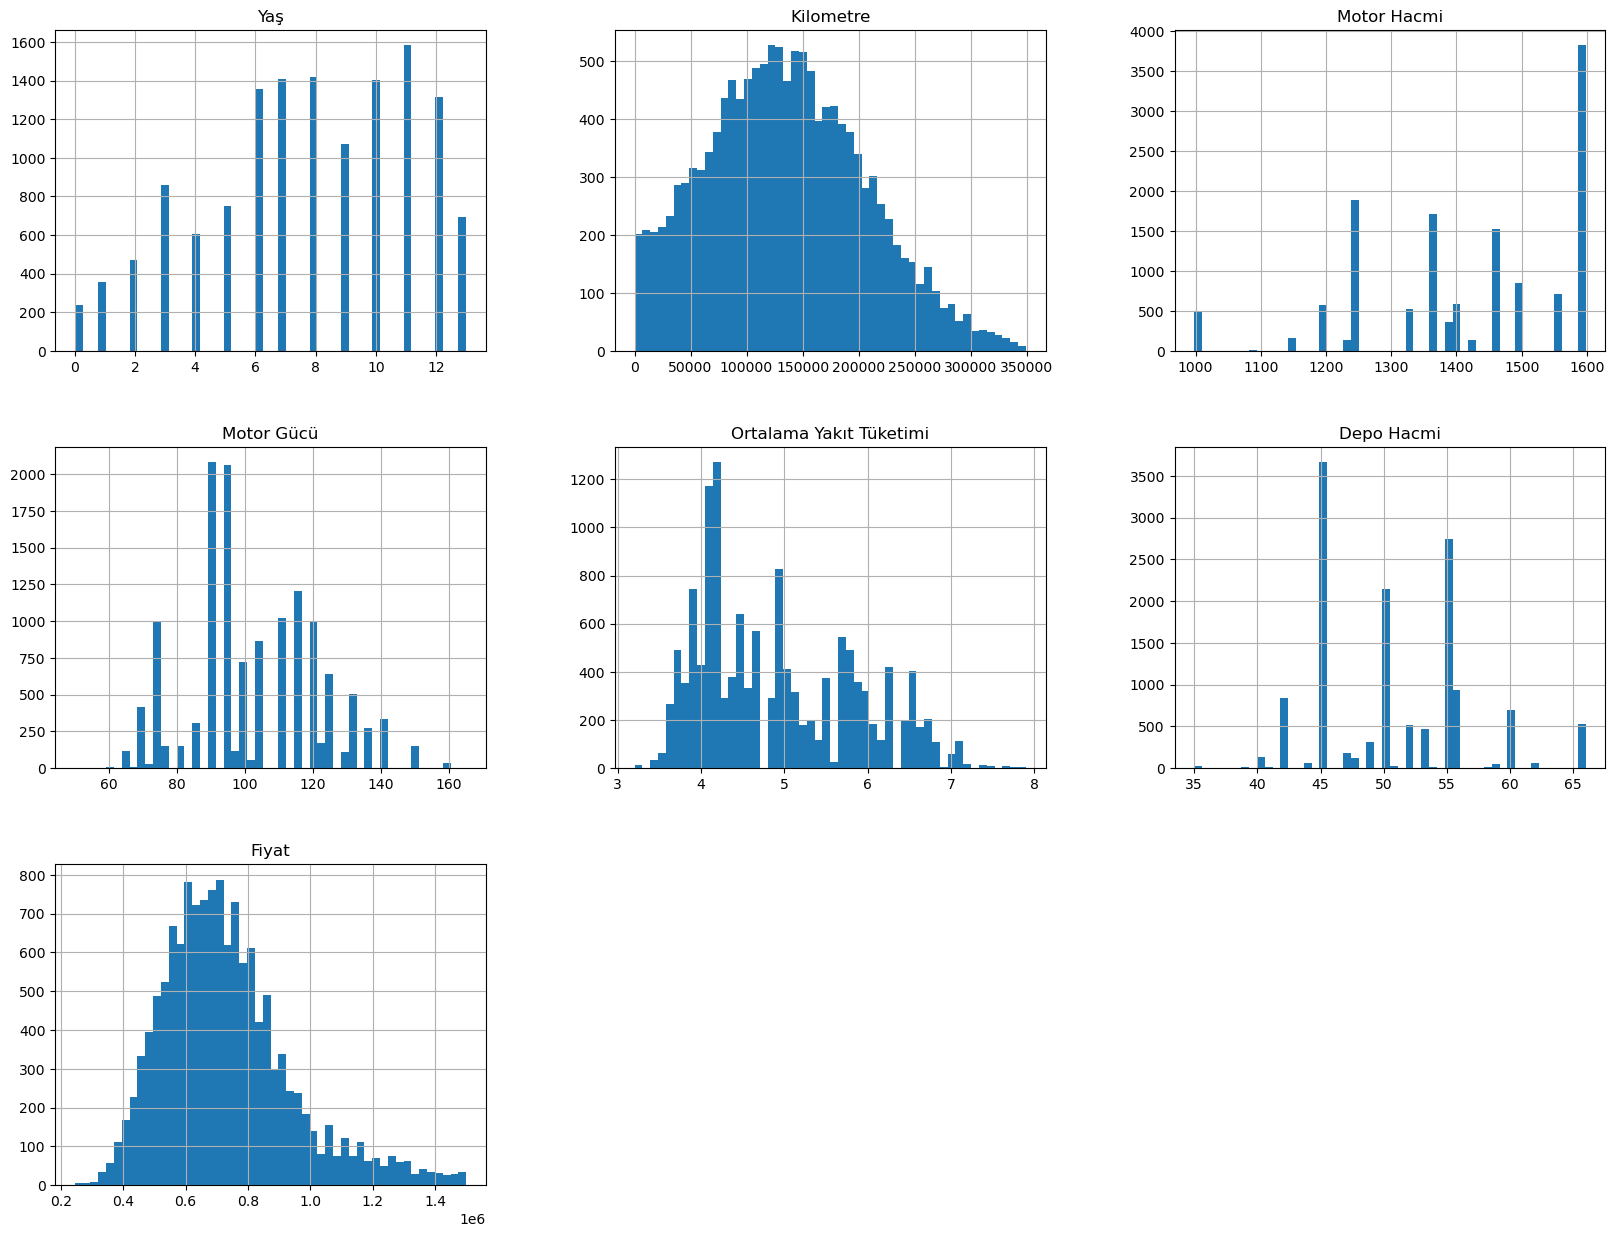

In [14]:
smaller_df2.hist(bins=50, figsize=(20,15))   #histogram çizdirir ön veri incelenmesi için kullanılır

In [1]:

import statsmodels.api as sm

# Veri seti içerisindeki feature ve target sütunlarını oluşturma
X = smaller_df2.drop(columns=["Fiyat",])
y = smaller_df2.loc[:,"Fiyat"]


# Housing_Price_Index sütununu tahmin etmek için modelimizi oluşturuyoruz
car_price_model = sm.OLS(y, X)

results = car_price_model.fit()

# Oluşturduğumuz modelin özeti
results.summary()


NameError: name 'smaller_df2' is not defined

In [16]:
smaller_df2.columns

Index(['Yaş', 'Kilometre', 'Motor Hacmi', 'Motor Gücü',
       'Ortalama Yakıt Tüketimi', 'Depo Hacmi', 'Fiyat'],
      dtype='object')

In [17]:
smaller_df2.corr()  #korelasyon matrisi

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat
Yaş,1.000000,0.622878,0.092750,-0.280624,0.085805,0.147774,-0.571744
Kilometre,0.622878,1.000000,0.162012,-0.203544,-0.227883,0.186844,-0.463231
Motor Hacmi,0.092750,0.162012,1.000000,0.470696,0.019372,0.450801,0.277335
Motor Gücü,-0.280624,-0.203544,0.470696,1.000000,0.286507,0.496992,0.606063
Ortalama Yakıt Tüketimi,0.085805,-0.227883,0.019372,0.286507,1.000000,0.104758,-0.065648
Depo Hacmi,0.147774,0.186844,0.450801,0.496992,0.104758,1.000000,0.386032
Fiyat,-0.571744,-0.463231,0.277335,0.606063,-0.065648,0.386032,1.000000


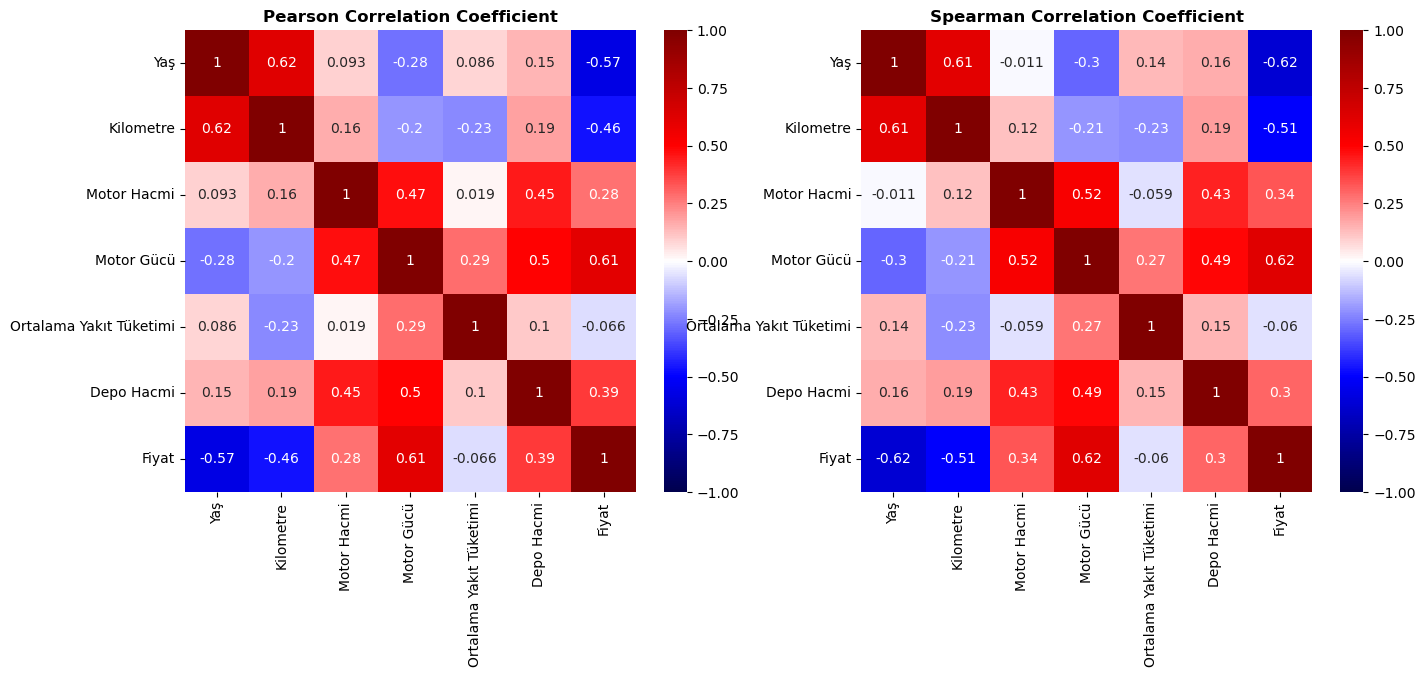

In [18]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
plt.title('Pearson Correlation Coefficient', weight='bold')
sns.heatmap(smaller_df2.corr(method='pearson'), cmap="seismic", annot=True, vmin=-1, vmax=1);

plt.subplot(1,2,2)
plt.title('Spearman Correlation Coefficient', weight='bold')
sns.heatmap(smaller_df2.corr(method='spearman'), cmap="seismic", annot=True, vmin=-1, vmax=1);

---
Multicollinearity  KONTROLÜ

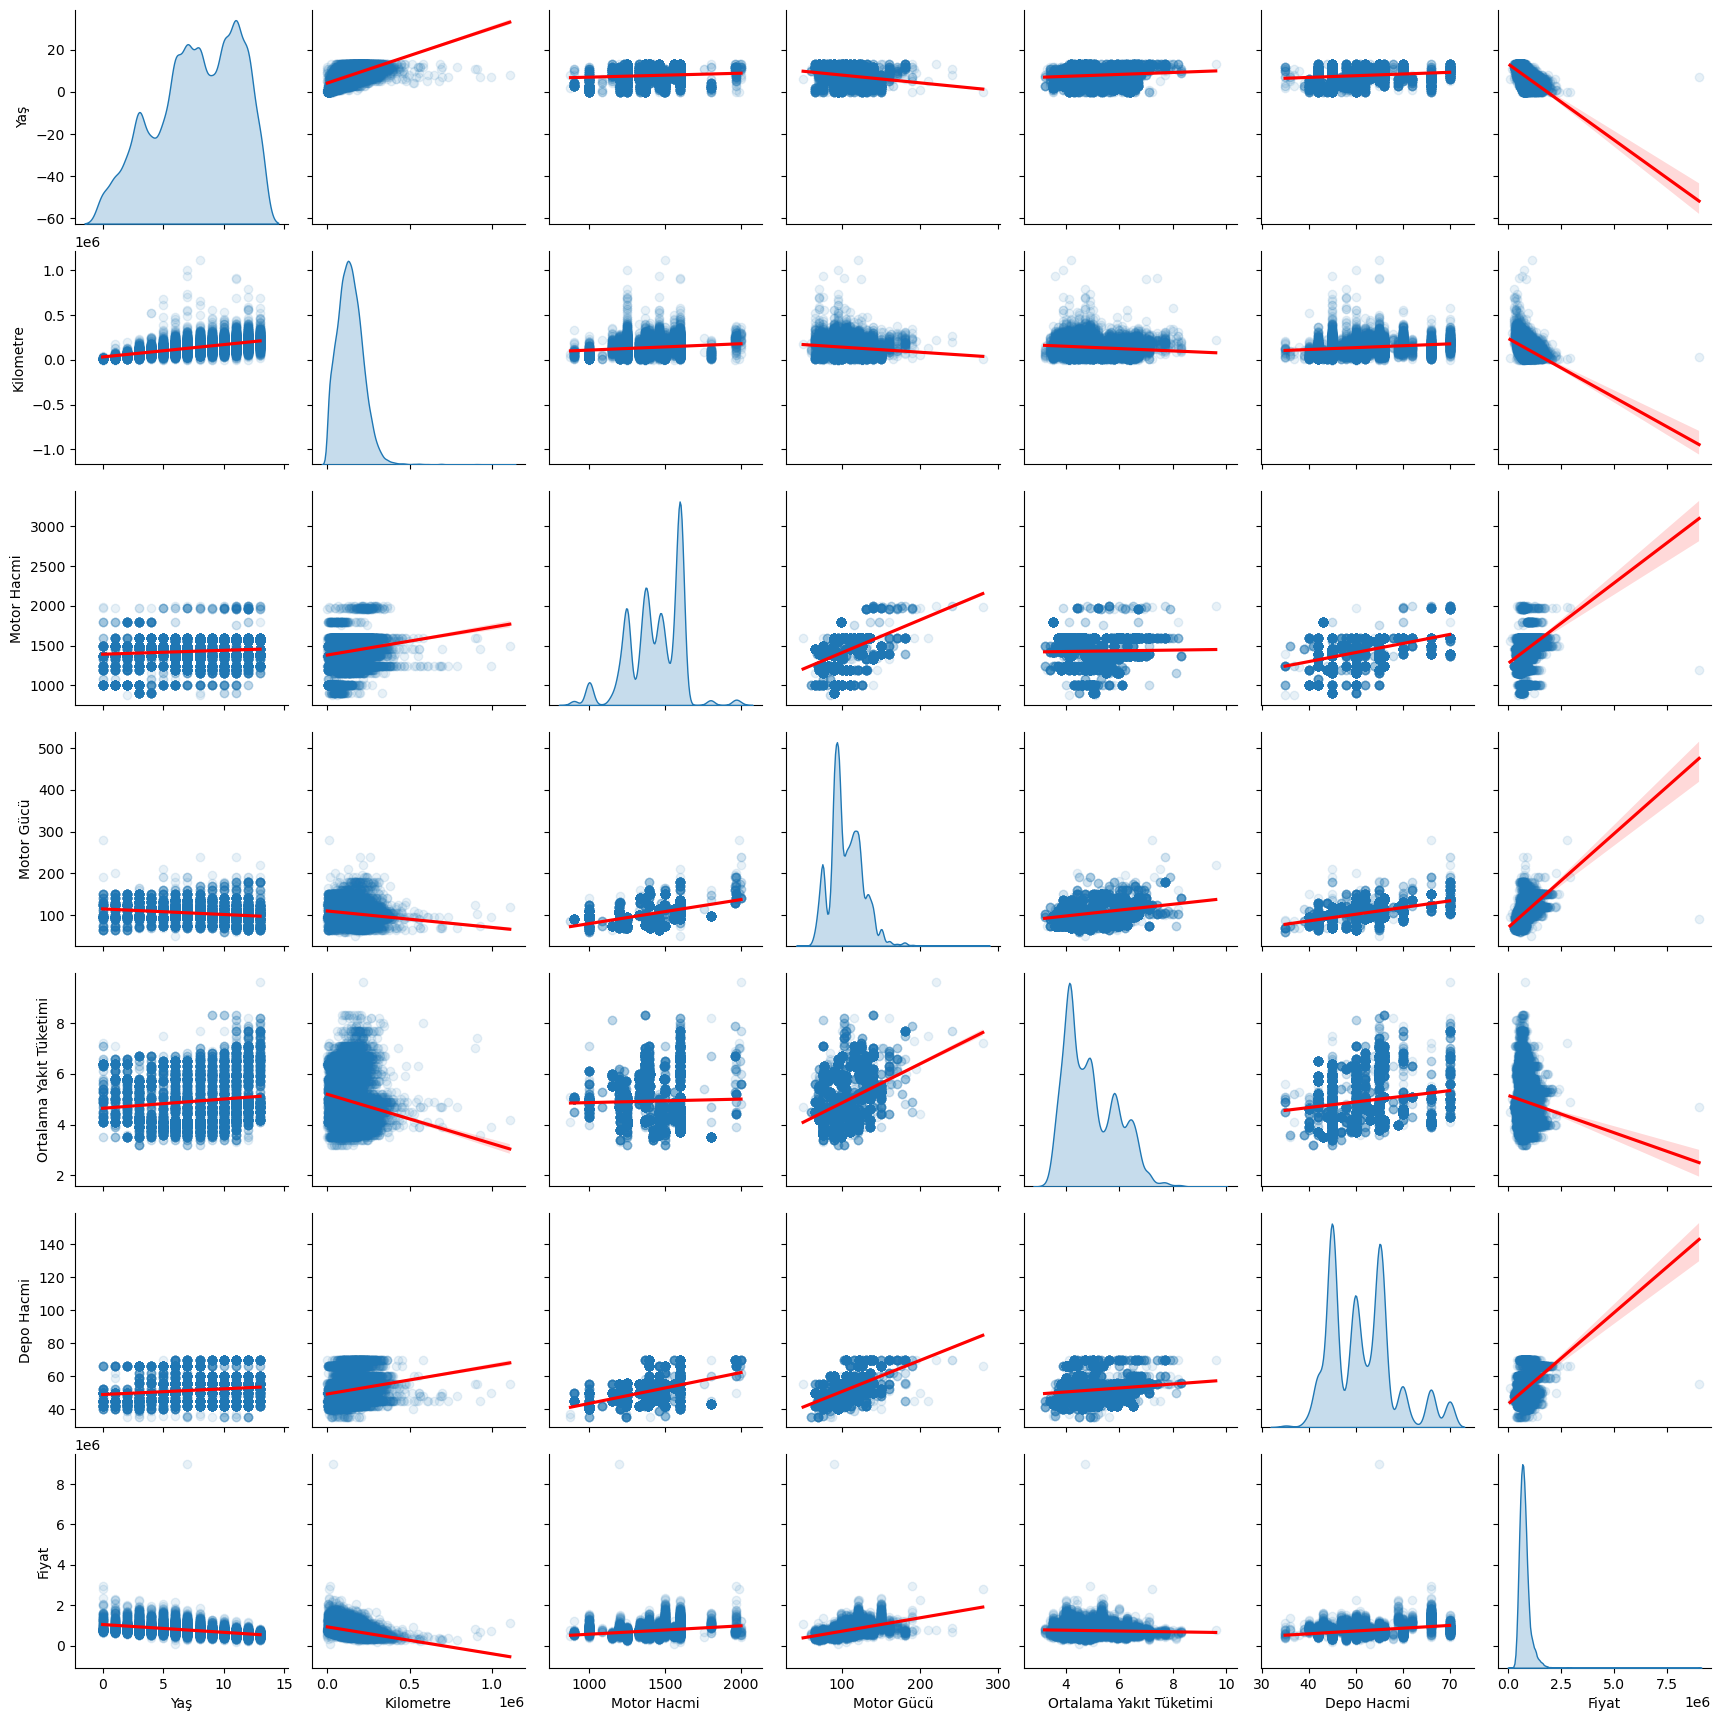

In [19]:
sns.pairplot(smaller_df1, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

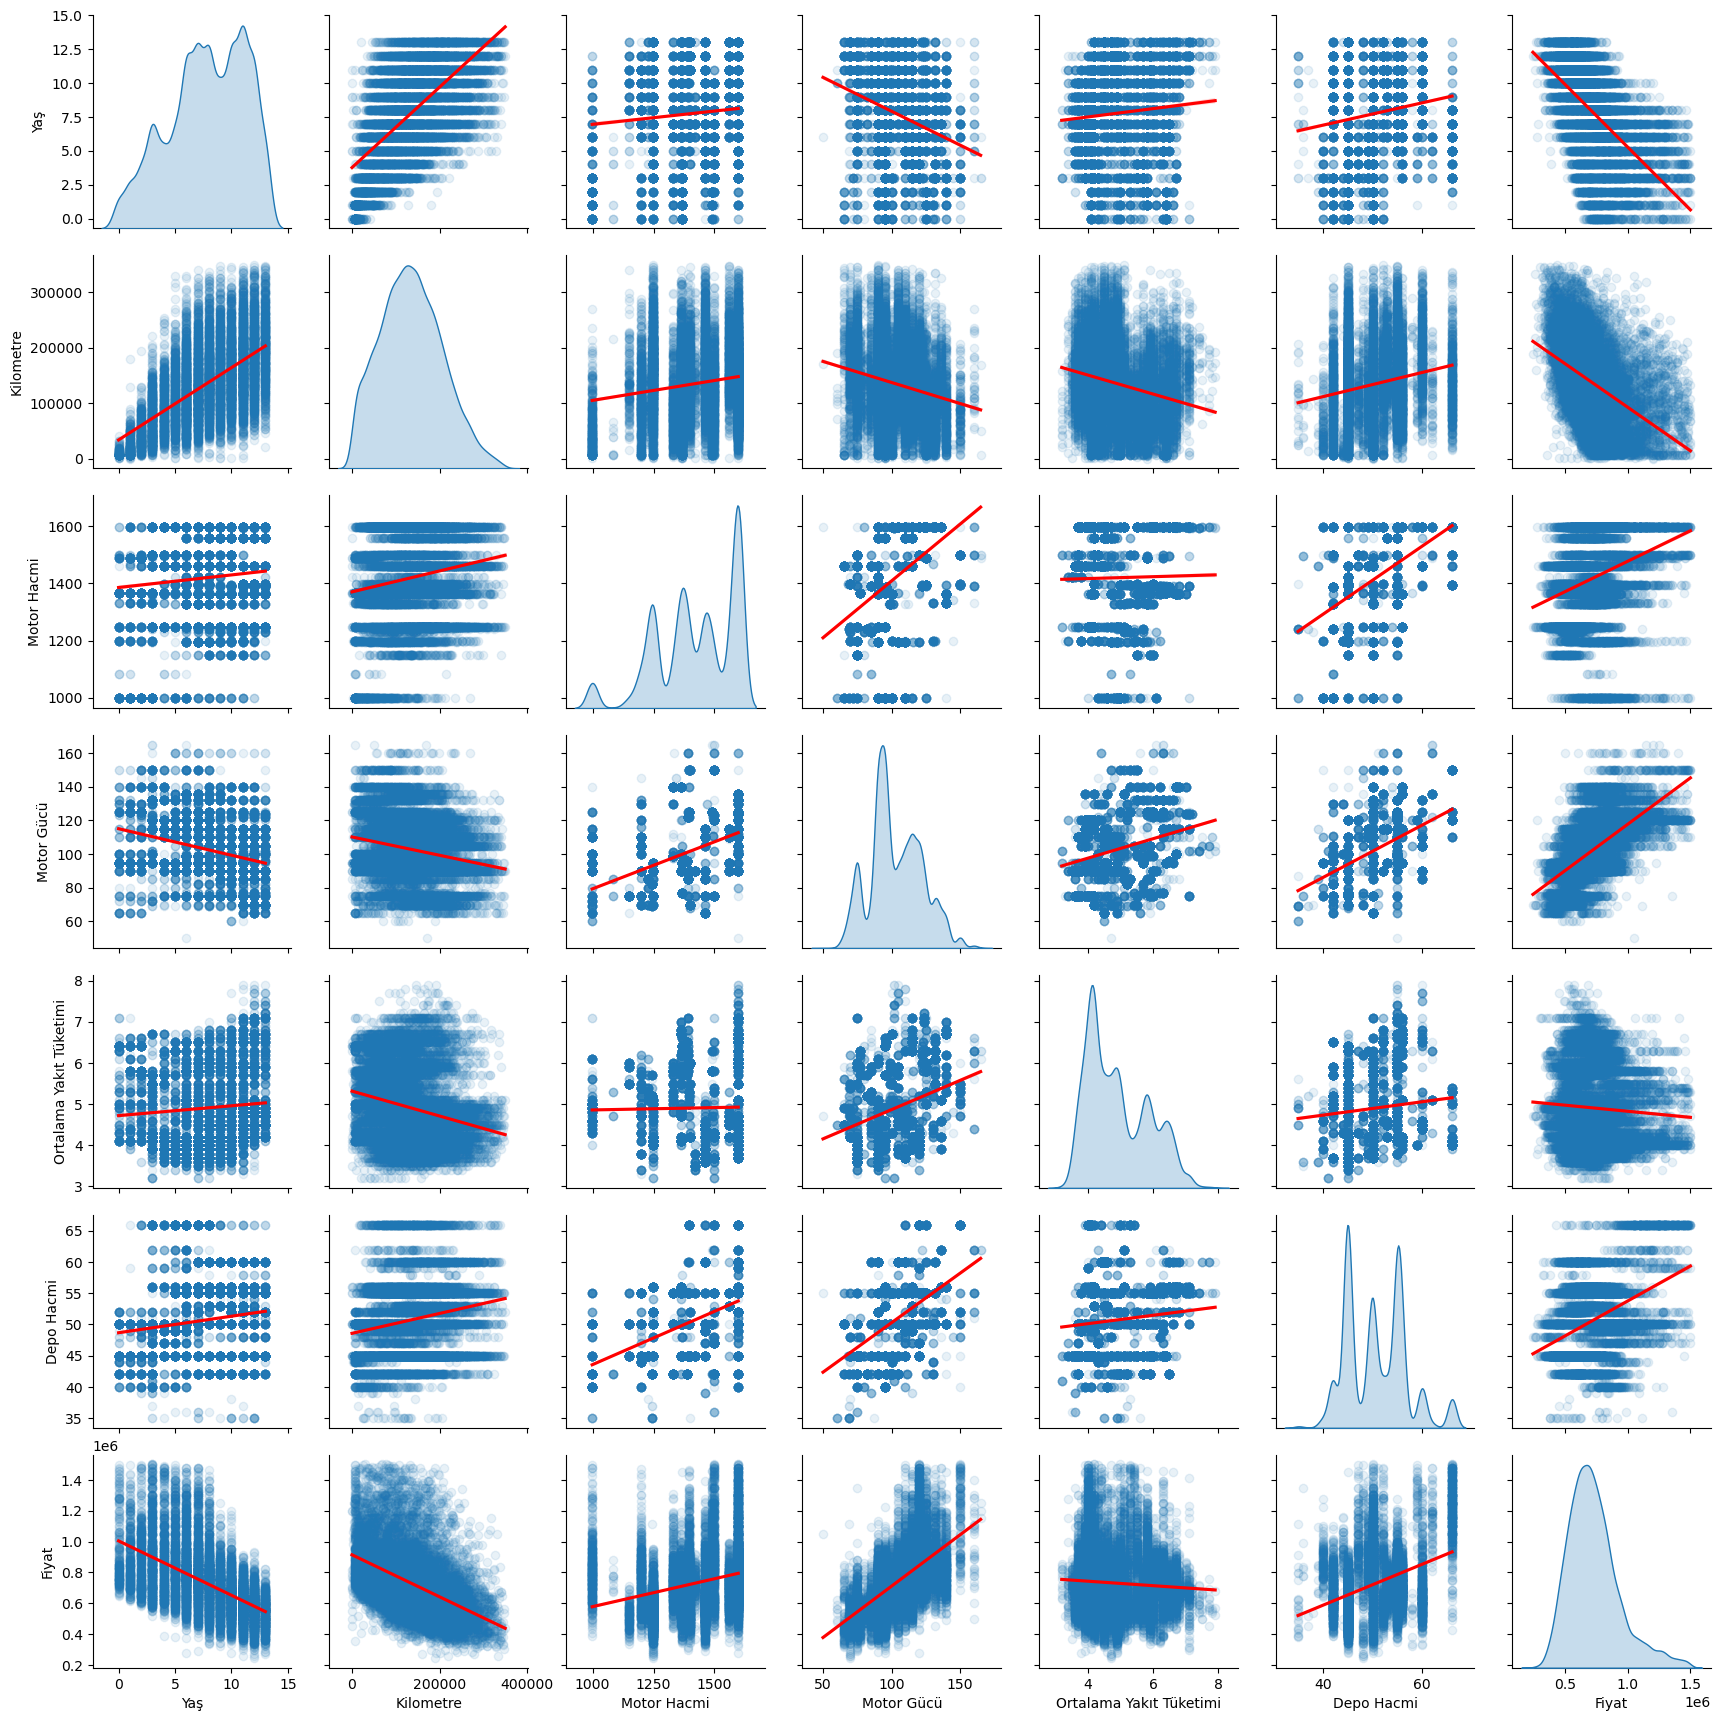

In [20]:
sns.pairplot(smaller_df2, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}});

In [21]:
#hiç bir işlem yapmadan performansı test edelim.
import patsy
import statsmodels.api as sm

formula = 'Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")'
y, X = patsy.dmatrices(formula, data=smaller_df2, return_type='dataframe')

model = sm.OLS(y, X)
fit = model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Fiyat   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     4982.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:45   Log-Likelihood:            -1.7691e+05
No. Observations:               13527   AIC:                         3.538e+05
Df Residuals:                   13520   BIC:                         3.539e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [22]:
smaller_df2.corr()['Fiyat'].sort_values(ascending=False)

Fiyat                      1.000000
Motor Gücü                 0.606063
Depo Hacmi                 0.386032
Motor Hacmi                0.277335
Ortalama Yakıt Tüketimi   -0.065648
Kilometre                 -0.463231
Yaş                       -0.571744
Name: Fiyat, dtype: float64

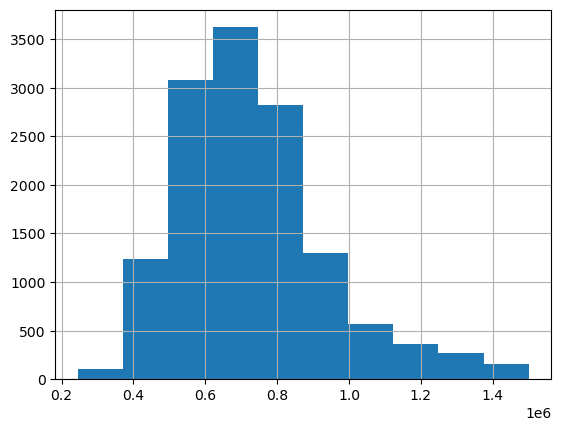

In [23]:
smaller_df2.Fiyat.hist();
#pozitif sağa çarpık

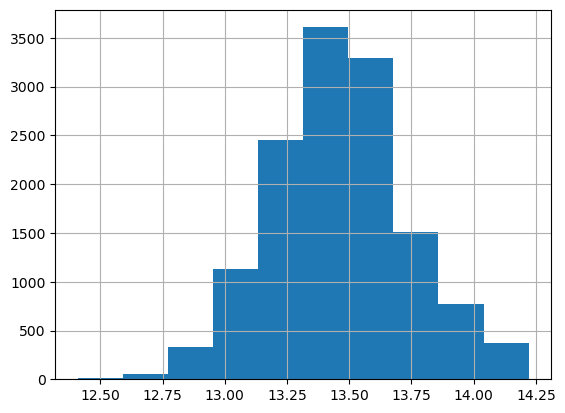

In [24]:
smaller_df2['log_Fiyat'] = np.log(smaller_df2.Fiyat)

# Artık dağılım daha iyi gözüküyor :)
smaller_df2.log_Fiyat.hist();

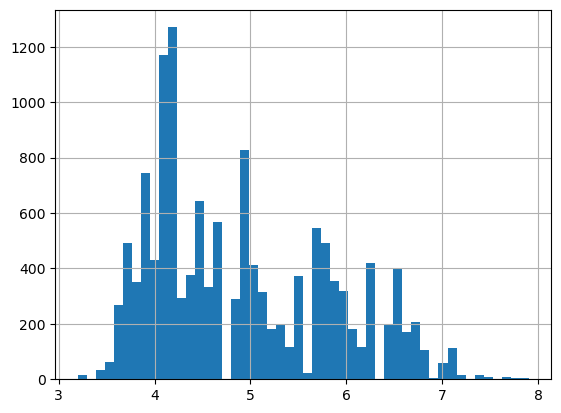

In [25]:
smaller_df2["Ortalama Yakıt Tüketimi"].hist( bins=50,);
#pozitif sağa çarpık

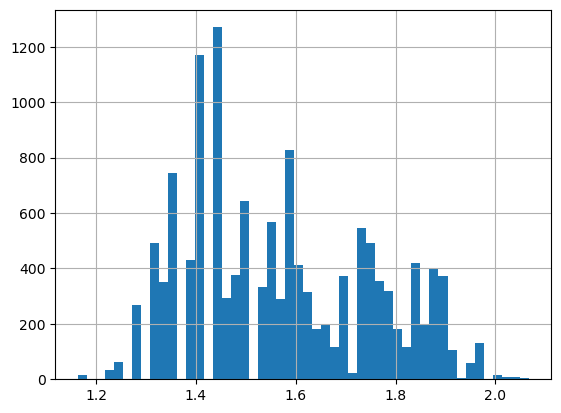

In [26]:
smaller_df2['log_Tuketim'] = np.log(smaller_df2["Ortalama Yakıt Tüketimi"])
# NEREDEYSE HİÇ BİR ŞEY DEĞİŞMEDİ 
smaller_df2.log_Tuketim.hist(bins=50);



In [27]:
smaller_df2

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952
...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466


In [28]:
# Modeli Eğitme ve Model Sonucunu Görüntüleme
lsm = smf.ols('log_Fiyat ~  log_Tuketim +  Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")', data=smaller_df2)
fit1 = lsm.fit()
fit1.summary()

#başarı arttı (sadece log_fiyat ile )0.688 ---> 0.965
#log_fiyat ve log_tuketim ile 0.965 ---> 0.965

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     4895.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:45   Log-Likelihood:                 6856.4
No. Observations:               13527   AIC:                        -1.370e+04
Df Residuals:                   13519   BIC:                        -1.364e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.8457      0.057    226.245      0.000      12.734      12.957
log_Tuketim                     -0.0928      0.085     -1.087      0.277      -0.260       0.075
Yaş                             -0.0237      0.001    -43.888      0.000      -0.025      -0.023
Kilometre                    -1.451e-06   2.48e-08    -58.410      0.000    -1.5e-06    -1.4e-06
Q("Motor Hacmi")                 0.0001   1.06e-05     12.832      0.000       0.000       0.000
Q("Motor Gücü")                  0.0050   9.82e-05     50.975      0.000       0.005       0.005
Q("Ortalama Yakıt Tüketimi")    -0.0522      0.017     -3.100      0.002      -0.085      -0.019
Q("Depo Hacmi")                  0.0136      0.000     51.351      0.000       0.013       0.014
==============================================================================
Omnibus:                      195.824   Durbin-Watson:                   1.333
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.862
Skew:                          -0.134   Prob(JB):                     4.25e-69
Kurtosis:                       3.698   Cond. No.                     1.25e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
smaller_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13527 entries, 0 to 14602
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yaş                      13527 non-null  int64  
 1   Kilometre                13527 non-null  float64
 2   Motor Hacmi              13527 non-null  int64  
 3   Motor Gücü               13527 non-null  int64  
 4   Ortalama Yakıt Tüketimi  13527 non-null  float64
 5   Depo Hacmi               13527 non-null  float64
 6   Fiyat                    13527 non-null  int64  
 7   log_Fiyat                13527 non-null  float64
 8   log_Tuketim              13527 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.0 MB


In [30]:
df      #marka Bilgisi ekleme

,Marka,Seri,Model,Araç Yılı,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş Tipi,Ortalama Yakıt Tüketimi,Depo Hacmi,Boya/Değişen Bilgisi,Fiyat,Yaş
0,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2018,161000.0,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,115,Önden Çekiş,4.2,50.0,1 boyalı,970000,5
1,Volkswagen,Polo,1.0 TSi Highline,2018,82000.0,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,95,Önden Çekiş,4.6,40.0,4 boyalı,860000,5
4,Volkswagen,Polo,1.4 TDi Comfortline,2016,73000.0,Düz,Dizel,Hatchback/5,Beyaz,1422,90,Önden Çekiş,3.4,45.0,Tamamı orjinal,770000,7
6,Volkswagen,Jetta,1.4 TSi Comfortline,2014,115000.0,Düz,Benzin,Sedan,Siyah,1390,122,Önden Çekiş,6.2,55.0,Tamamı orjinal,980000,9
7,Volkswagen,Polo,1.4 Comfortline,2014,93500.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1390,85,Önden Çekiş,5.9,45.0,Tamamı orjinal,665000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,Fiat,Palio,1.3 Multijet Active Sole,2010,159000.0,Düz,Dizel,Hatchback/5,Beyaz,1248,70,Önden Çekiş,4.6,51.0,Belirtilmemiş,403000,13
14599,Fiat,Egea,1.4 Fire Easy,2019,68000.0,Düz,Benzin,Sedan,Beyaz,1368,95,Önden Çekiş,5.7,45.0,Tamamı orjinal,600000,4
14600,Fiat,Linea,1.3 Multijet Pop,2016,161000.0,Düz,Dizel,Sedan,Beyaz,1248,95,Önden Çekiş,4.9,45.0,Belirtilmemiş,515000,7
14601,Fiat,Punto,1.4 Easy S&S,2013,194800.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1368,77,Önden Çekiş,5.7,45.0,"3 değişen, 2 boyalı",510000,10


In [31]:
df.Marka.value_counts()

Marka
Fiat          2263
Ford          2210
Renault       2202
Opel          2089
Toyota        1929
Volkswagen    1819
Skoda         1015
Name: count, dtype: int64

In [32]:
brand = pd.get_dummies(df.Marka, drop_first=True)
brand

,Ford,Opel,Renault,Skoda,Toyota,Volkswagen
0,False,False,False,False,False,True
1,False,False,False,False,False,True
4,False,False,False,False,False,True
6,False,False,False,False,False,True
7,False,False,False,False,False,True
...,...,...,...,...,...,...
14598,False,False,False,False,False,False
14599,False,False,False,False,False,False
14600,False,False,False,False,False,False
14601,False,False,False,False,False,False


In [33]:
df2 = smaller_df2.join(brand)

In [34]:
# Modeli Eğitme ve Model Sonucunu Görüntüleme
lsm = smf.ols('log_Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")  + Ford + Opel + Renault + Skoda + Toyota + Volkswagen ', data=df2)
fit1 = lsm.fit()
fit1.summary()

#başarı arttı   0.965 ----> 0.966


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     5374.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                 10174.
No. Observations:               13527   AIC:                        -2.032e+04
Df Residuals:                   13514   BIC:                        -2.022e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.9194      0.011   1129.418      0.000      12.897      12.942
Ford[T.True]                     0.1874      0.004     50.329      0.000       0.180       0.195
Opel[T.True]                     0.1201      0.004     31.576      0.000       0.113       0.128
Renault[T.True]                  0.0747      0.004     20.762      0.000       0.068       0.082
Skoda[T.True]                    0.2896      0.005     61.935      0.000       0.280       0.299
Toyota[T.True]                   0.2098      0.004     54.412      0.000       0.202       0.217
Volkswagen[T.True]               0.3017      0.004     76.695      0.000       0.294       0.309
Yaş                             -0.0321      0.000    -71.424      0.000      -0.033      -0.031
Kilometre                    -1.176e-06   1.99e-08    -59.179      0.000   -1.21e-06   -1.14e-06
Q("Motor Hacmi")              9.595e-05   7.84e-06     12.244      0.000    8.06e-05       0.000
Q("Motor Gücü")                  0.0042   7.84e-05     53.626      0.000       0.004       0.004
Q("Ortalama Yakıt Tüketimi")    -0.0484      0.001    -38.120      0.000      -0.051      -0.046
Q("Depo Hacmi")                  0.0092      0.000     41.445      0.000       0.009       0.010
==============================================================================
Omnibus:                      623.342   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2161.774
Skew:                          -0.072   Prob(JB):                         0.00
Kurtosis:                       4.953   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#VİTES BİLGİSİ EKLEME LABEL ENCODİNG

In [36]:
vites = df["Vites Tipi"]
df3 = df2.join(vites)
df3.sample(10, random_state=42)

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi
8990,7,90000.0,1598,115,6.5,56.0,675000,13.422468,1.871802,False,True,False,False,False,False,Düz
3601,10,152000.0,1364,90,4.1,55.0,660000,13.399995,1.410987,False,False,False,False,True,False,Düz
2939,7,113000.0,1364,90,4.1,55.0,850000,13.652992,1.410987,False,False,False,False,True,False,Düz
10839,12,170000.0,1560,110,4.8,55.0,625000,13.345507,1.568616,True,False,False,False,False,False,Düz
236,13,220000.0,1390,122,6.0,55.0,705000,13.465953,1.791759,False,False,False,False,False,True,Yarı Otomatik
8182,12,224000.0,1248,90,5.1,52.0,587000,13.282780,1.629241,False,True,False,False,False,False,Düz
1828,12,145000.0,1390,85,5.8,45.0,574000,13.260385,1.757858,False,False,False,False,False,True,Yarı Otomatik
480,6,140000.0,1197,105,4.9,55.0,950000,13.764217,1.589235,False,False,False,False,False,True,Yarı Otomatik
8565,10,115000.0,1598,115,6.3,52.0,550000,13.217674,1.840550,False,True,False,False,False,False,Yarı Otomatik
11454,13,230000.0,1399,68,4.5,45.0,465000,13.049793,1.504077,True,False,False,False,False,False,Düz


In [37]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
le = LabelEncoder()
df3['Vites Tipi'] = le.fit_transform(df3['Vites Tipi'])
df3


,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085,False,False,False,False,False,True,2
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056,False,False,False,False,False,True,2
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775,False,False,False,False,False,True,0
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549,False,False,False,False,False,True,0
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952,False,False,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056,False,False,False,False,False,False,0
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466,False,False,False,False,False,False,0
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235,False,False,False,False,False,False,0
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466,False,False,False,False,False,False,0


In [38]:
df3.replace({'Vites Tipi': { 'Düz' :1.0 , 'Yarı Otomatik':1.5 , 'Otomatik':2.0}}, inplace=True)

In [39]:
parça = df["Boya/Değişen Bilgisi"]
df4 = df3.join(parça)
df4.sample(10, random_state=42)

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Boya/Değişen Bilgisi
8990,7,90000.0,1598,115,6.5,56.0,675000,13.422468,1.871802,False,True,False,False,False,False,0,"1 değişen, 2 boyalı"
3601,10,152000.0,1364,90,4.1,55.0,660000,13.399995,1.410987,False,False,False,False,True,False,0,Belirtilmemiş
2939,7,113000.0,1364,90,4.1,55.0,850000,13.652992,1.410987,False,False,False,False,True,False,0,Tamamı orjinal
10839,12,170000.0,1560,110,4.8,55.0,625000,13.345507,1.568616,True,False,False,False,False,False,0,2 boyalı
236,13,220000.0,1390,122,6.0,55.0,705000,13.465953,1.791759,False,False,False,False,False,True,2,8 boyalı
8182,12,224000.0,1248,90,5.1,52.0,587000,13.282780,1.629241,False,True,False,False,False,False,0,Tamamı orjinal
1828,12,145000.0,1390,85,5.8,45.0,574000,13.260385,1.757858,False,False,False,False,False,True,2,"1 değişen, 1 boyalı"
480,6,140000.0,1197,105,4.9,55.0,950000,13.764217,1.589235,False,False,False,False,False,True,2,Tamamı orjinal
8565,10,115000.0,1598,115,6.3,52.0,550000,13.217674,1.840550,False,True,False,False,False,False,2,"2 değişen, 2 boyalı"
11454,13,230000.0,1399,68,4.5,45.0,465000,13.049793,1.504077,True,False,False,False,False,False,0,"1 değişen, 2 boyalı"


In [40]:
df4.replace({'Boya/Değişen Bilgisi': { 'Belirtilmemiş' : 'Tamamı orjinal'}}, inplace=True)

In [41]:
df4

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Boya/Değişen Bilgisi
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085,False,False,False,False,False,True,2,1 boyalı
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056,False,False,False,False,False,True,2,4 boyalı
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775,False,False,False,False,False,True,0,Tamamı orjinal
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549,False,False,False,False,False,True,0,Tamamı orjinal
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952,False,False,False,False,False,True,0,Tamamı orjinal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056,False,False,False,False,False,False,0,Tamamı orjinal
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466,False,False,False,False,False,False,0,Tamamı orjinal
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235,False,False,False,False,False,False,0,Tamamı orjinal
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466,False,False,False,False,False,False,0,"3 değişen, 2 boyalı"


In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
data = df4

le = LabelEncoder()
data["Boya/Değişen Bilgisi"] = le.fit_transform(data["Boya/Değişen Bilgisi"])


In [43]:
df4

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Boya/Değişen Bilgisi
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085,False,False,False,False,False,True,2,0
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056,False,False,False,False,False,True,2,42
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775,False,False,False,False,False,True,0,73
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549,False,False,False,False,False,True,0,73
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952,False,False,False,False,False,True,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056,False,False,False,False,False,False,0,73
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466,False,False,False,False,False,False,0,73
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235,False,False,False,False,False,False,0,73
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466,False,False,False,False,False,False,0,34


In [44]:
# Modeli Eğitme ve Model Sonucunu Görüntüleme
lsm = smf.ols('log_Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")  + Ford + Opel + Renault + Skoda + Toyota + Volkswagen + Q("Vites Tipi") + Q("Boya/Değişen Bilgisi")  ', data=df4)
fit1 = lsm.fit()
fit1.summary()

#başarı arttı   0.965 ----> 0.966

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     5158.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                 10812.
No. Observations:               13527   AIC:                        -2.159e+04
Df Residuals:                   13512   BIC:                        -2.148e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.8908      0.011   1165.198      0.000      12.869      12.912
Ford[T.True]                     0.1819      0.004     51.154      0.000       0.175       0.189
Opel[T.True]                     0.1136      0.004     31.235      0.000       0.106       0.121
Renault[T.True]                  0.0534      0.003     15.305      0.000       0.047       0.060
Skoda[T.True]                    0.2447      0.005     52.487      0.000       0.236       0.254
Toyota[T.True]                   0.1917      0.004     51.501      0.000       0.184       0.199
Volkswagen[T.True]               0.2649      0.004     67.890      0.000       0.257       0.273
Yaş                             -0.0311      0.000    -72.235      0.000      -0.032      -0.030
Kilometre                    -1.138e-06    1.9e-08    -59.881      0.000   -1.18e-06    -1.1e-06
Q("Motor Hacmi")              8.825e-05   7.48e-06     11.798      0.000    7.36e-05       0.000
Q("Motor Gücü")                  0.0035   7.81e-05     44.210      0.000       0.003       0.004
Q("Ortalama Yakıt Tüketimi")    -0.0402      0.001    -32.555      0.000      -0.043      -0.038
Q("Depo Hacmi")                  0.0097      0.000     45.507      0.000       0.009       0.010
Q("Vites Tipi")                  0.0435      0.001     34.073      0.000       0.041       0.046
Q("Boya/Değişen Bilgisi")        0.0005   3.32e-05     14.547      0.000       0.000       0.001
==============================================================================
Omnibus:                      736.173   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2723.744
Skew:                          -0.143   Prob(JB):                         0.00
Kurtosis:                       5.180   Cond. No.                     1.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
corr = df4.corr()
corr

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Boya/Değişen Bilgisi
Yaş,1.000000,0.622878,0.092750,-0.280624,0.085805,0.147774,-0.571744,-0.589093,0.087290,0.184557,0.126528,-0.090929,-0.066275,0.005959,0.033611,-0.197839,-0.186809
Kilometre,0.622878,1.000000,0.162012,-0.203544,-0.227883,0.186844,-0.463231,-0.500669,-0.228402,0.109290,-0.030870,0.037706,0.013749,-0.101415,0.048592,-0.082205,-0.174842
Motor Hacmi,0.092750,0.162012,1.000000,0.470696,0.019372,0.450801,0.277335,0.286212,-0.010552,0.203220,-0.023286,-0.088938,0.122261,0.038577,0.022564,0.200375,-0.030970
Motor Gücü,-0.280624,-0.203544,0.470696,1.000000,0.286507,0.496992,0.606063,0.619748,0.283090,-0.043965,0.141958,-0.165093,0.094399,0.100551,0.081607,0.346044,0.065357
Ortalama Yakıt Tüketimi,0.085805,-0.227883,0.019372,0.286507,1.000000,0.104758,-0.065648,-0.049102,0.996233,-0.041648,0.232430,-0.168069,-0.152824,0.189788,-0.111676,-0.174957,0.027089
Depo Hacmi,0.147774,0.186844,0.450801,0.496992,0.104758,1.000000,0.386032,0.368834,0.104146,-0.067992,0.077076,-0.007701,0.152228,0.143862,0.144388,0.187878,0.008540
Fiyat,-0.571744,-0.463231,0.277335,0.606063,-0.065648,0.386032,1.000000,0.981307,-0.066598,-0.071010,-0.089217,-0.125096,0.271348,0.117730,0.270313,0.496756,0.179764
log_Fiyat,-0.589093,-0.500669,0.286212,0.619748,-0.049102,0.368834,0.981307,1.000000,-0.052628,-0.059408,-0.075595,-0.129102,0.253549,0.141104,0.257793,0.497971,0.181162
log_Tuketim,0.087290,-0.228402,-0.010552,0.283090,0.996233,0.104146,-0.066598,-0.052628,1.000000,-0.040222,0.225251,-0.176543,-0.157215,0.195125,-0.107930,-0.176041,0.028856
Ford,0.184557,0.109290,0.203220,-0.043965,-0.041648,-0.067992,-0.071010,-0.059408,-0.040222,1.000000,-0.188853,-0.194859,-0.125864,-0.180221,-0.174183,-0.124639,-0.051390


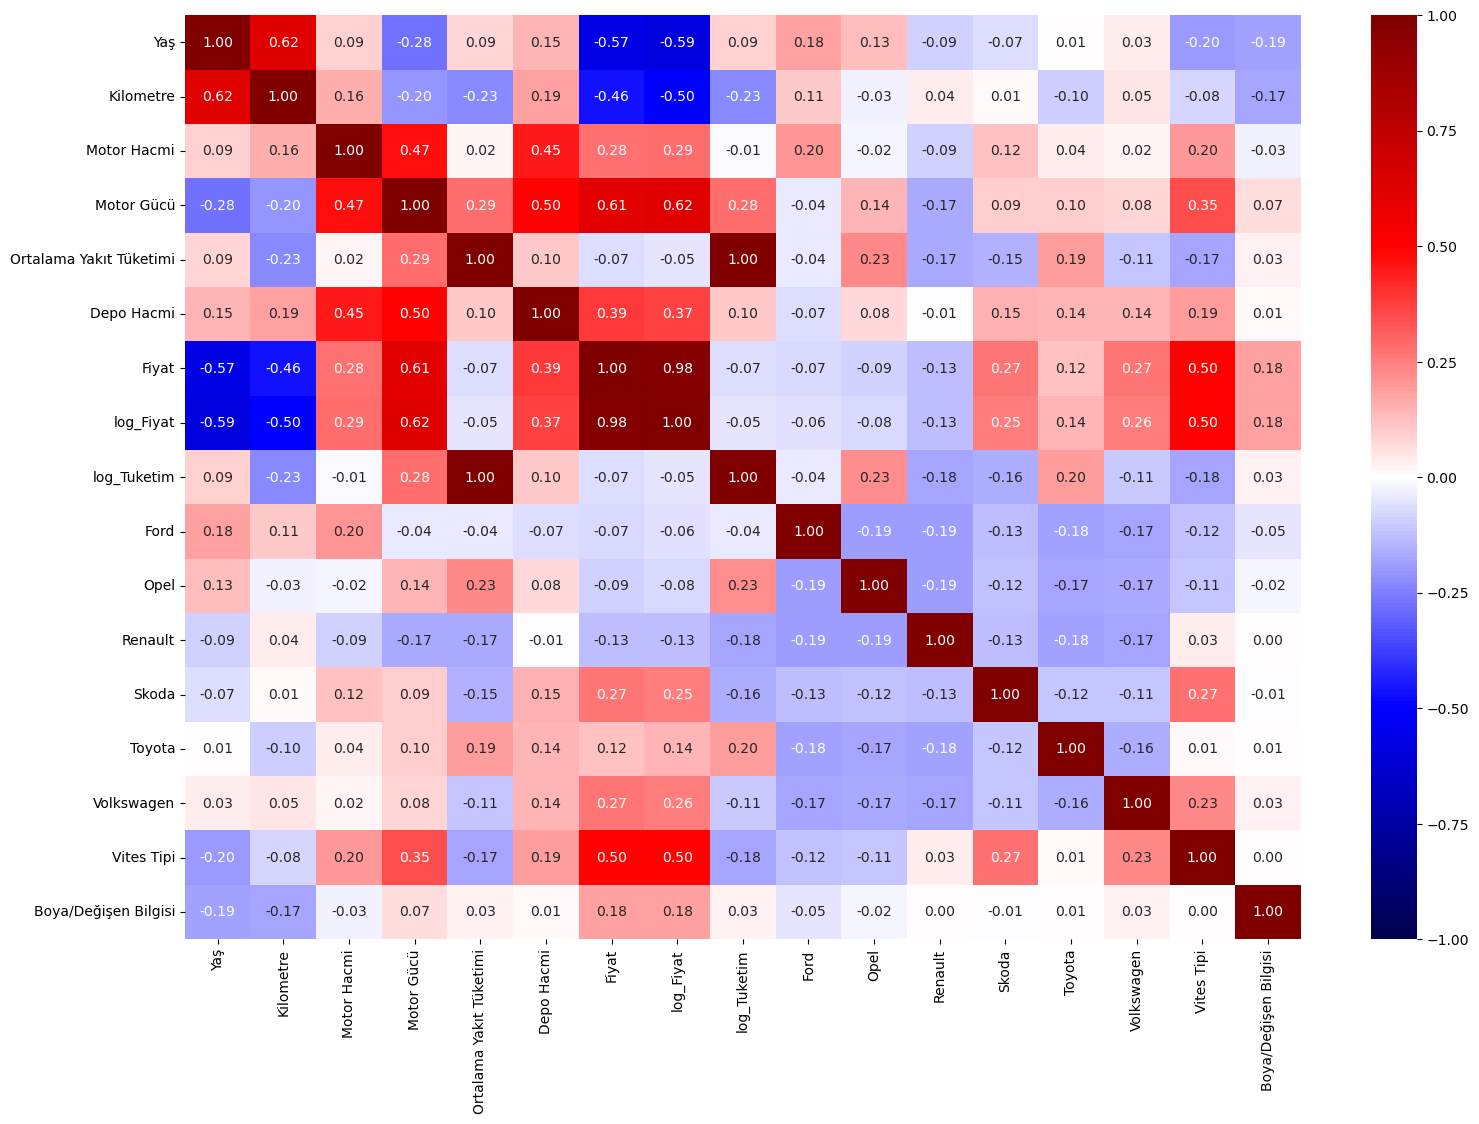

In [46]:
plt.figure(figsize=[18,12])
sns.heatmap(df4.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1, fmt='.2f');

In [47]:
correlation_matrix = df4.corr()
correlation_list = correlation_matrix['log_Fiyat'].sort_values(ascending=False)
correlation_list


log_Fiyat                  1.000000
Fiyat                      0.981307
Motor Gücü                 0.619748
Vites Tipi                 0.497971
Depo Hacmi                 0.368834
Motor Hacmi                0.286212
Volkswagen                 0.257793
Skoda                      0.253549
Boya/Değişen Bilgisi       0.181162
Toyota                     0.141104
Ortalama Yakıt Tüketimi   -0.049102
log_Tuketim               -0.052628
Ford                      -0.059408
Opel                      -0.075595
Renault                   -0.129102
Kilometre                 -0.500669
Yaş                       -0.589093
Name: log_Fiyat, dtype: float64

In [48]:
# Modeli Eğitme ve Model Sonucunu Görüntüleme
lsm = smf.ols('log_Fiyat ~ Yaş + Kilometre + Q("Motor Hacmi") + Q("Motor Gücü") + Q("Ortalama Yakıt Tüketimi") + Q("Depo Hacmi")  + Ford + Opel + Renault + Skoda + Toyota + Volkswagen + Q("Vites Tipi") ', data=df3)
fit1 = lsm.fit()
fit1.summary()

#başarı arttı   0.965 ----> 0.966

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     5453.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:14:46   Log-Likelihood:                 10707.
No. Observations:               13527   AIC:                        -2.139e+04
Df Residuals:                   13513   BIC:                        -2.128e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       12.9172      0.011   1174.591      0.000      12.896      12.939
Ford[T.True]                     0.1813      0.004     50.576      0.000       0.174       0.188
Opel[T.True]                     0.1128      0.004     30.789      0.000       0.106       0.120
Renault[T.True]                  0.0529      0.004     15.050      0.000       0.046       0.060
Skoda[T.True]                    0.2440      0.005     51.929      0.000       0.235       0.253
Toyota[T.True]                   0.1909      0.004     50.918      0.000       0.184       0.198
Volkswagen[T.True]               0.2661      0.004     67.695      0.000       0.258       0.274
Yaş                             -0.0317      0.000    -73.355      0.000      -0.033      -0.031
Kilometre                    -1.158e-06   1.91e-08    -60.619      0.000    -1.2e-06   -1.12e-06
Q("Motor Hacmi")              8.689e-05   7.54e-06     11.527      0.000    7.21e-05       0.000
Q("Motor Gücü")                  0.0034   7.87e-05     43.793      0.000       0.003       0.004
Q("Ortalama Yakıt Tüketimi")    -0.0401      0.001    -32.179      0.000      -0.043      -0.038
Q("Depo Hacmi")                  0.0099      0.000     45.938      0.000       0.009       0.010
Q("Vites Tipi")                  0.0428      0.001     33.301      0.000       0.040       0.045
==============================================================================
Omnibus:                      696.321   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2491.526
Skew:                          -0.130   Prob(JB):                         0.00
Kurtosis:                       5.086   Cond. No.                     1.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
df4

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen,Vites Tipi,Boya/Değişen Bilgisi
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085,False,False,False,False,False,True,2,0
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056,False,False,False,False,False,True,2,42
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775,False,False,False,False,False,True,0,73
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549,False,False,False,False,False,True,0,73
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952,False,False,False,False,False,True,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,13,159000.0,1248,70,4.6,51.0,403000,12.906692,1.526056,False,False,False,False,False,False,0,73
14599,4,68000.0,1368,95,5.7,45.0,600000,13.304685,1.740466,False,False,False,False,False,False,0,73
14600,7,161000.0,1248,95,4.9,45.0,515000,13.151922,1.589235,False,False,False,False,False,False,0,73
14601,10,194800.0,1368,77,5.7,45.0,510000,13.142166,1.740466,False,False,False,False,False,False,0,34


In [68]:
df

,Marka,Seri,Model,Araç Yılı,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş Tipi,Ortalama Yakıt Tüketimi,Depo Hacmi,Boya/Değişen Bilgisi,Fiyat,Yaş
0,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2018,161000.0,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,115,Önden Çekiş,4.2,50.0,1 boyalı,970000,5
1,Volkswagen,Polo,1.0 TSi Highline,2018,82000.0,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,95,Önden Çekiş,4.6,40.0,4 boyalı,860000,5
4,Volkswagen,Polo,1.4 TDi Comfortline,2016,73000.0,Düz,Dizel,Hatchback/5,Beyaz,1422,90,Önden Çekiş,3.4,45.0,Tamamı orjinal,770000,7
6,Volkswagen,Jetta,1.4 TSi Comfortline,2014,115000.0,Düz,Benzin,Sedan,Siyah,1390,122,Önden Çekiş,6.2,55.0,Tamamı orjinal,980000,9
7,Volkswagen,Polo,1.4 Comfortline,2014,93500.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1390,85,Önden Çekiş,5.9,45.0,Tamamı orjinal,665000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,Fiat,Palio,1.3 Multijet Active Sole,2010,159000.0,Düz,Dizel,Hatchback/5,Beyaz,1248,70,Önden Çekiş,4.6,51.0,Belirtilmemiş,403000,13
14599,Fiat,Egea,1.4 Fire Easy,2019,68000.0,Düz,Benzin,Sedan,Beyaz,1368,95,Önden Çekiş,5.7,45.0,Tamamı orjinal,600000,4
14600,Fiat,Linea,1.3 Multijet Pop,2016,161000.0,Düz,Dizel,Sedan,Beyaz,1248,95,Önden Çekiş,4.9,45.0,Belirtilmemiş,515000,7
14601,Fiat,Punto,1.4 Easy S&S,2013,194800.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1368,77,Önden Çekiş,5.7,45.0,"3 değişen, 2 boyalı",510000,10


In [71]:
df["depo_hacmi_kullanabilirlik"] = df["Depo Hacmi"] / df["Ortalama Yakıt Tüketimi"]
df5 = df4.join(oran)
df5.sample(10, random_state=42)

ValueError: Other Series must have a name

In [72]:
df["depo_hacmi_kullanabilirlik"] = df["Depo Hacmi"] / df["Ortalama Yakıt Tüketimi"]


In [74]:
df["ters_motor_gucu"] = 1 / df["Motor Gücü"]
df["yakit_ekonomisi"] = df["ters_motor_gucu"] * df["Ortalama Yakıt Tüketimi"]
df["engine_ratio"] = df["Motor Hacmi"] / df["Motor Gücü"]


In [75]:
df

,Marka,Seri,Model,Araç Yılı,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,...,Çekiş Tipi,Ortalama Yakıt Tüketimi,Depo Hacmi,Boya/Değişen Bilgisi,Fiyat,Yaş,depo_hacmi_kullanabilirlik,ters_motor_gucu,yakit_ekonomisi,engine_ratio
0,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,2018,161000.0,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598,...,Önden Çekiş,4.2,50.0,1 boyalı,970000,5,11.904762,0.008696,0.036522,13.895652
1,Volkswagen,Polo,1.0 TSi Highline,2018,82000.0,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,...,Önden Çekiş,4.6,40.0,4 boyalı,860000,5,8.695652,0.010526,0.048421,10.515789
4,Volkswagen,Polo,1.4 TDi Comfortline,2016,73000.0,Düz,Dizel,Hatchback/5,Beyaz,1422,...,Önden Çekiş,3.4,45.0,Tamamı orjinal,770000,7,13.235294,0.011111,0.037778,15.800000
6,Volkswagen,Jetta,1.4 TSi Comfortline,2014,115000.0,Düz,Benzin,Sedan,Siyah,1390,...,Önden Çekiş,6.2,55.0,Tamamı orjinal,980000,9,8.870968,0.008197,0.050820,11.393443
7,Volkswagen,Polo,1.4 Comfortline,2014,93500.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1390,...,Önden Çekiş,5.9,45.0,Tamamı orjinal,665000,9,7.627119,0.011765,0.069412,16.352941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,Fiat,Palio,1.3 Multijet Active Sole,2010,159000.0,Düz,Dizel,Hatchback/5,Beyaz,1248,...,Önden Çekiş,4.6,51.0,Belirtilmemiş,403000,13,11.086957,0.014286,0.065714,17.828571
14599,Fiat,Egea,1.4 Fire Easy,2019,68000.0,Düz,Benzin,Sedan,Beyaz,1368,...,Önden Çekiş,5.7,45.0,Tamamı orjinal,600000,4,7.894737,0.010526,0.060000,14.400000
14600,Fiat,Linea,1.3 Multijet Pop,2016,161000.0,Düz,Dizel,Sedan,Beyaz,1248,...,Önden Çekiş,4.9,45.0,Belirtilmemiş,515000,7,9.183673,0.010526,0.051579,13.136842
14601,Fiat,Punto,1.4 Easy S&S,2013,194800.0,Düz,LPG & Benzin,Hatchback/5,Beyaz,1368,...,Önden Çekiş,5.7,45.0,"3 değişen, 2 boyalı",510000,10,7.894737,0.012987,0.074026,17.766234


In [ ]:
vites = df["Vites Tipi"]
df3 = df2.join(vites)
df3.sample(10, random_state=42)

In [ ]:
df5 = df.join(df[""] )

In [49]:
df2.head()

,Yaş,Kilometre,Motor Hacmi,Motor Gücü,Ortalama Yakıt Tüketimi,Depo Hacmi,Fiyat,log_Fiyat,log_Tuketim,Ford,Opel,Renault,Skoda,Toyota,Volkswagen
0,5,161000.0,1598,115,4.2,50.0,970000,13.785051,1.435085,False,False,False,False,False,True
1,5,82000.0,999,95,4.6,40.0,860000,13.664688,1.526056,False,False,False,False,False,True
4,7,73000.0,1422,90,3.4,45.0,770000,13.554146,1.223775,False,False,False,False,False,True
6,9,115000.0,1390,122,6.2,55.0,980000,13.795308,1.824549,False,False,False,False,False,True
7,9,93500.0,1390,85,5.9,45.0,665000,13.407542,1.774952,False,False,False,False,False,True


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13527 entries, 0 to 14602
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yaş                      13527 non-null  int64  
 1   Kilometre                13527 non-null  float64
 2   Motor Hacmi              13527 non-null  int64  
 3   Motor Gücü               13527 non-null  int64  
 4   Ortalama Yakıt Tüketimi  13527 non-null  float64
 5   Depo Hacmi               13527 non-null  float64
 6   Fiyat                    13527 non-null  int64  
 7   log_Fiyat                13527 non-null  float64
 8   log_Tuketim              13527 non-null  float64
 9   Ford                     13527 non-null  bool   
 10  Opel                     13527 non-null  bool   
 11  Renault                  13527 non-null  bool   
 12  Skoda                    13527 non-null  bool   
 13  Toyota                   13527 non-null  bool   
 14  Volkswagen               13

#-------------

# test validation yöntemleri dersiii

In [57]:
df4.columns

Index(['Yaş', 'Kilometre', 'Motor Hacmi', 'Motor Gücü',
       'Ortalama Yakıt Tüketimi', 'Depo Hacmi', 'Fiyat', 'log_Fiyat',
       'log_Tuketim', 'Ford', 'Opel', 'Renault', 'Skoda', 'Toyota',
       'Volkswagen', 'Vites Tipi', 'Boya/Değişen Bilgisi'],
      dtype='object')

## model testi 

In [58]:
#modeli test etmek için hazırlık aşaması

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X = df4.drop(columns=['Fiyat', 'log_Fiyat'])
y = df4['log_Fiyat']

# Veri setinin %20'lik kısmını Test aşaması için saklıyoruz
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("x_test:", x_test.shape)
print("y_test", y_test.shape)

X_train: (10821, 15)
Y_train: (10821,)
x_test: (2706, 15)
y_test (2706,)


In [59]:
#eğitim ve validasyon için ayrı ayrı veri seti oluşturma
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (8115, 15)
y_train: (8115,)
x_val: (2706, 15)
y_val: (2706,)


In [60]:
# Validation aşaması (model seçimi) için kullanacağımız 3 modeli oluşturma

# Lineer Regresyon
lm = LinearRegression()

# Ridge Regresyon
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.values)
x_val_scaled = scaler.transform(x_val.values)
x_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=1)

# Polinomal Regresyon
poly = PolynomialFeatures(degree=2) 

x_train_poly = poly.fit_transform(x_train.values)
x_val_poly = poly.transform(x_val.values)
x_test_poly = poly.transform(x_test.values)

lm_poly = LinearRegression()

In [61]:
# Validation veri setindeki sonuçlar

lm.fit(x_train, y_train)
print(f'Linear Regression R2: {lm.score(x_val, y_val):.3f}')

lm_reg.fit(x_train_scaled, y_train)
print(f'Ridge Regression R2: {lm_reg.score(x_val_scaled, y_val):.3f}')

lm_poly.fit(x_train_poly, y_train)
print(f'Degree 2 Polynomial Regression R2: {lm_poly.score(x_val_poly, y_val):.3f}')

Linear Regression R2: 0.853
Ridge Regression R2: 0.853
Degree 2 Polynomial Regression R2: 0.875


In [56]:
scores = []
poly_degrees = 5

for degree in range(1, poly_degrees+1):
    
    poly = PolynomialFeatures(degree=degree)
    
    # Polinomal özelliklerin dönüştürülmesi
    x_train_poly = poly.fit_transform(x_train.values)
    x_val_poly = poly.transform(x_val.values)
    
    lm_poly = LinearRegression()

    lm_poly.fit(x_train_poly, y_train)

    scores.append(lm_poly.score(x_val_poly, y_val))

# Sonuçları inceleme    
for degree, score in enumerate(scores):
    print(f"Polynomial Degree: {degree+1}, Validation Score: {score:.3f}")

Polynomial Degree: 1, Validation Score: 0.853
Polynomial Degree: 2, Validation Score: 0.875
Polynomial Degree: 3, Validation Score: 0.863
Polynomial Degree: 4, Validation Score: 0.867
Polynomial Degree: 5, Validation Score: 0.852


In [62]:
# İşte modelimizin başarısı
X_scaled = scaler.fit_transform(X_train.values)
lm_reg.fit(X_scaled, Y_train)
print(f'Ridge Regression Test R2: {lm_reg.score(x_test_scaled, y_test):.3f}')

Ridge Regression Test R2: 0.844


# cross valiadition ----

In [63]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

lr_cv = cross_val_score(lr, X_train, Y_train, cv=10, scoring='r2')
lr_cv

array([0.84127714, 0.83550228, 0.81833403, 0.83831642, 0.84854581,
       0.83349797, 0.85467564, 0.84762951, 0.85834046, 0.83753926])

In [64]:
ridge = Ridge()
X_train_scaled = scaler.fit_transform(X_train.values)

ridge_cv = cross_val_score(ridge, X_train_scaled, Y_train, cv=10, scoring='r2')
ridge_cv

array([0.841295  , 0.83550046, 0.81834574, 0.83832193, 0.84853401,
       0.83351276, 0.85466561, 0.84763355, 0.85833197, 0.83752917])

In [65]:
#polinomal regresyon için cross validation


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


# Create the polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create the linear regression model
lm_poly = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(lm_poly, X_poly, y, cv=10, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())


Cross-Validation Scores: [0.84085649 0.83620711 0.83749906 0.8599     0.80598313 0.81927931
 0.83220831 0.83589454 0.83800924 0.81229422]
Mean Cross-Validation Score: 0.8318131419731337
Standard Deviation of Cross-Validation Scores: 0.014774202735428251


In [66]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Degree 2 Polynomial Regression'],
    'Cross Validated Score (Mean)': [lr_cv.mean(), ridge_cv.mean(), cv_scores.mean()],
    'Cross Validated Score (Std)': [lr_cv.std(), ridge_cv.std(), cv_scores.std()]})

result_df = results.sort_values(by='Cross Validated Score (Mean)', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Cross Validated Score (Mean),Cross Validated Score (Std)
Model,,
Ridge Regression,0.841367,0.010979
Linear Regression,0.841366,0.010985
Degree 2 Polynomial Regression,0.831813,0.014774


In [172]:
df2.to_pickle('df2_car_data.pkl')

In [173]:
#regulazition dersi

In [174]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from joblib import load

In [175]:
df2 = pd.read_pickle('df2_car_data.pkl')

In [176]:
df3 = df2.drop(columns=['Fiyat', 'Ford', 'Opel', 'Renault', 'Skoda', 'Toyota', 'Volkswagen'])

In [177]:
X = df3.drop(columns=['log_Fiyat'])
y = df3['log_Fiyat']

In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13527 entries, 0 to 14602
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yaş                      13527 non-null  int64  
 1   Kilometre                13527 non-null  float64
 2   Motor Hacmi              13527 non-null  int64  
 3   Motor Gücü               13527 non-null  int64  
 4   Ortalama Yakıt Tüketimi  13527 non-null  float64
 5   Depo Hacmi               13527 non-null  float64
 6   log_Tuketim              13527 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 845.4 KB


In [179]:
y

0        13.785051
1        13.664688
4        13.554146
6        13.795308
7        13.407542
           ...    
14598    12.906692
14599    13.304685
14600    13.151922
14601    13.142166
14602    12.899220
Name: log_Fiyat, Length: 13527, dtype: float64

In [180]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [181]:
X_train.shape

(8115, 7)

In [182]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
    
# Validation veri setiyle model sonucunu görme
validation_score = lr_model.score(X_val, y_val)
validation_score

0.7360853016497948

In [183]:
lr_model.score(X_train, y_train)

0.7109078412324616

In [184]:
import statsmodels.api as sm

# Modeli Oluşturma
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin özet tablosunu görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Fiyat   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     2848.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        05:57:22   Log-Likelihood:                 4033.8
No. Observations:                8115   AIC:                            -8052.
Df Residuals:                    8107   BIC:                            -7996.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.8042      0.076    169.312      0.000      12.656      12.952
Yaş                        -0.0236      0.001    -33.650      0.000      -0.025      -0.022
Kilometre               -1.461e-06   3.22e-08    -45.374      0.000   -1.52e-06    -1.4e-06
Motor Hacmi                 0.0001   1.39e-05     10.169      0.000       0.000       0.000
Motor Gücü                  0.0050      0.000     39.231      0.000       0.005       0.005
Ortalama Yakıt Tüketimi    -0.0608      0.022     -2.708      0.007      -0.105      -0.017
Depo Hacmi                  0.0139      0.000     40.039      0.000       0.013       0.015
log_Tuketim                -0.0549      0.114     -0.482      0.630      -0.278       0.168
==============================================================================
Omnibus:                      180.741   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.818
Skew:                          -0.159   Prob(JB):                     4.40e-74
Kurtosis:                       3.948   Cond. No.                     1.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [185]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8115 entries, 8397 to 8517
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Yaş                      8115 non-null   int64  
 1   Kilometre                8115 non-null   float64
 2   Motor Hacmi              8115 non-null   int64  
 3   Motor Gücü               8115 non-null   int64  
 4   Ortalama Yakıt Tüketimi  8115 non-null   float64
 5   Depo Hacmi               8115 non-null   float64
 6   log_Tuketim              8115 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 507.2 KB


In [186]:
lasso_model = Lasso(alpha = 2500)
lasso_model.fit(X_train, y_train)

Lasso(alpha=2500)

In [187]:
list(zip(X_train.columns, lasso_model.coef_))

[('Yaş', -0.0),
 ('Kilometre', -1.3909096552088966e-06),
 ('Motor Hacmi', 0.0),
 ('Motor Gücü', 0.0),
 ('Ortalama Yakıt Tüketimi', -0.0),
 ('Depo Hacmi', 0.0),
 ('log_Tuketim', -0.0)]

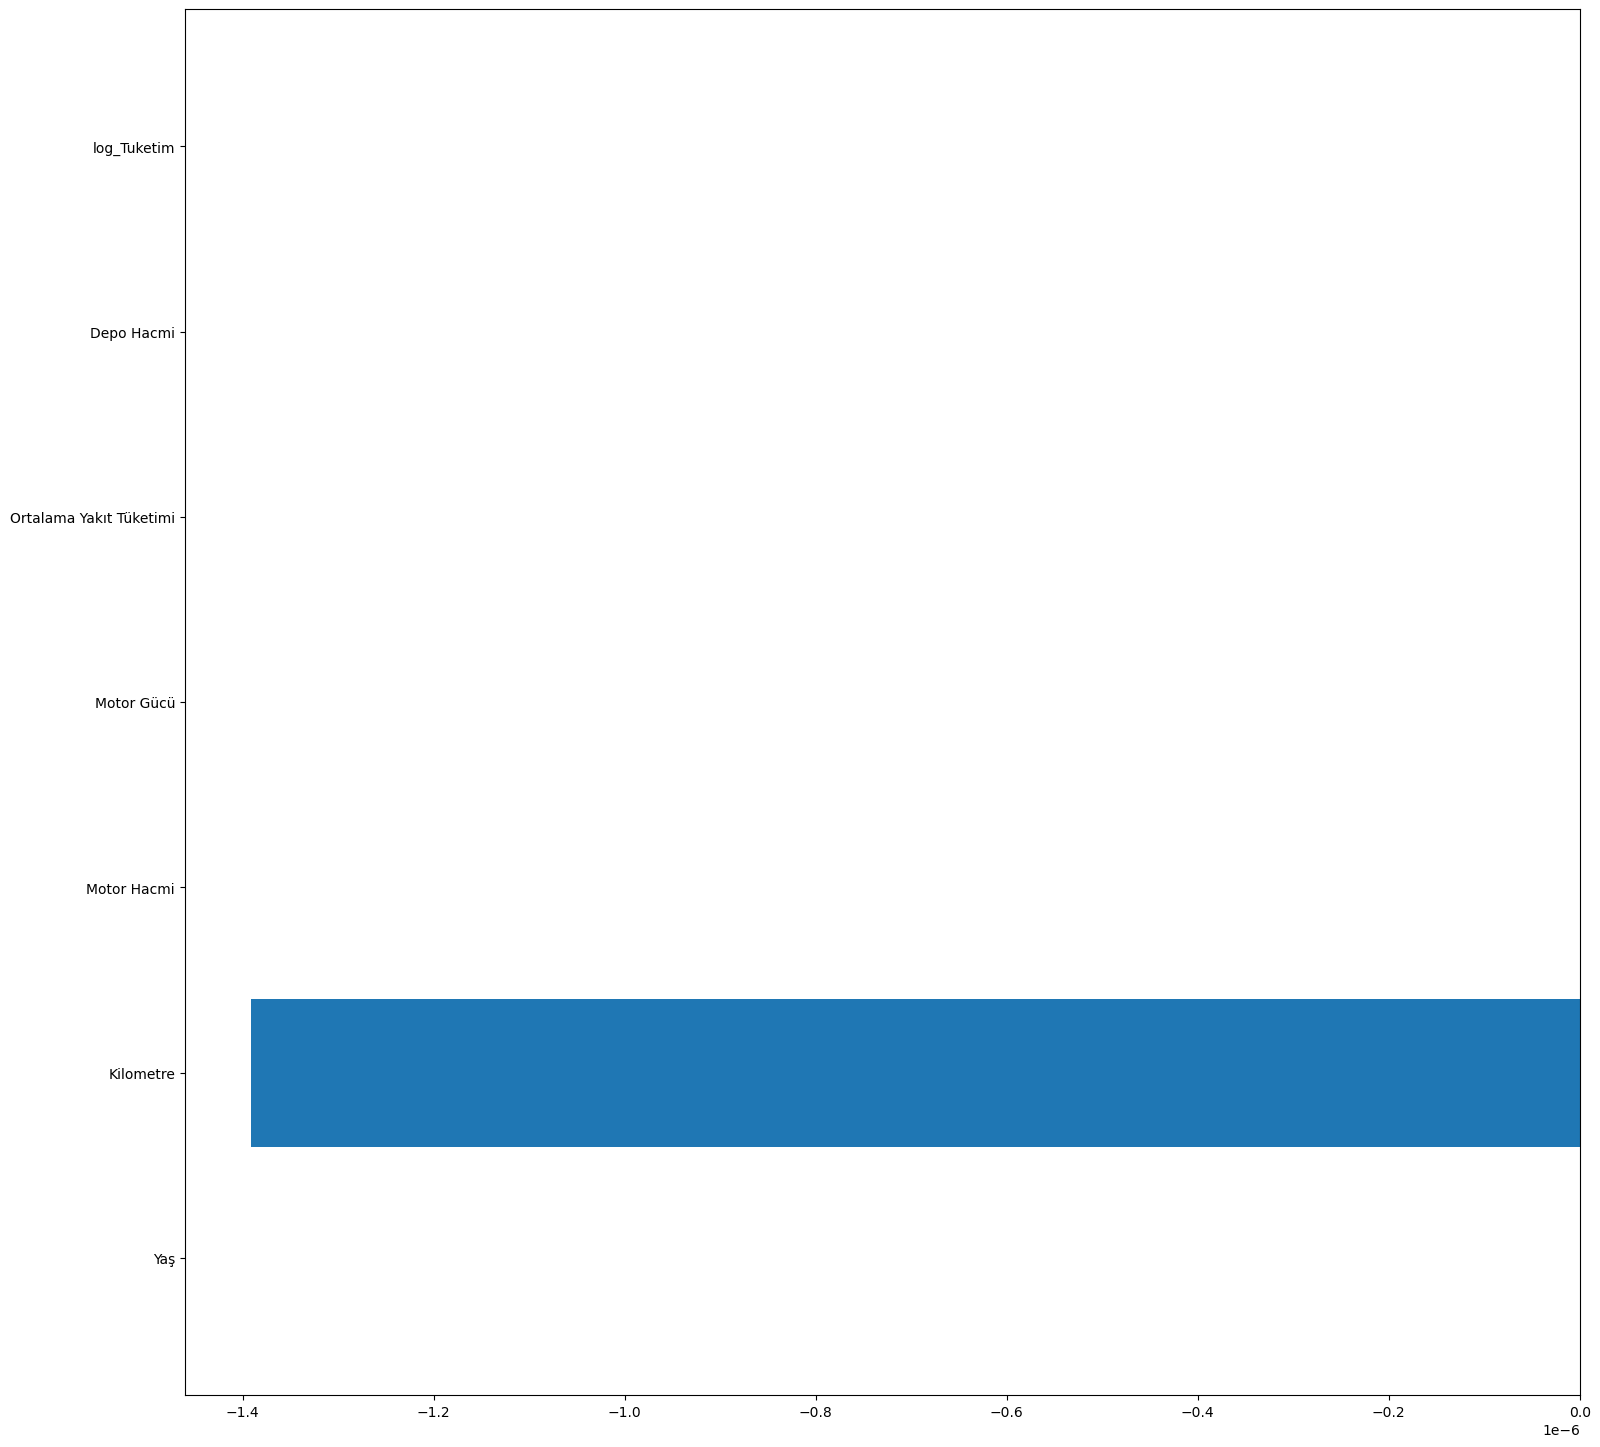

In [188]:
plt.figure(figsize=[18,18])
plt.barh(X_train.columns, lasso_model.coef_);